In [ ]:
#  K-Means clustering to the dataset using all features except 'DEATH_EVENT.'

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
heart_data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Apply K-Means clustering
X = heart_data.drop(columns=['DEATH_EVENT'])
features_scaled = StandardScaler().fit_transform(X)
n_clusters = 2  # Set the number of clusters to 2 (we can change the number of clusters)

kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
heart_data['KMeans_Cluster'] = kmeans.fit_predict(features_scaled)


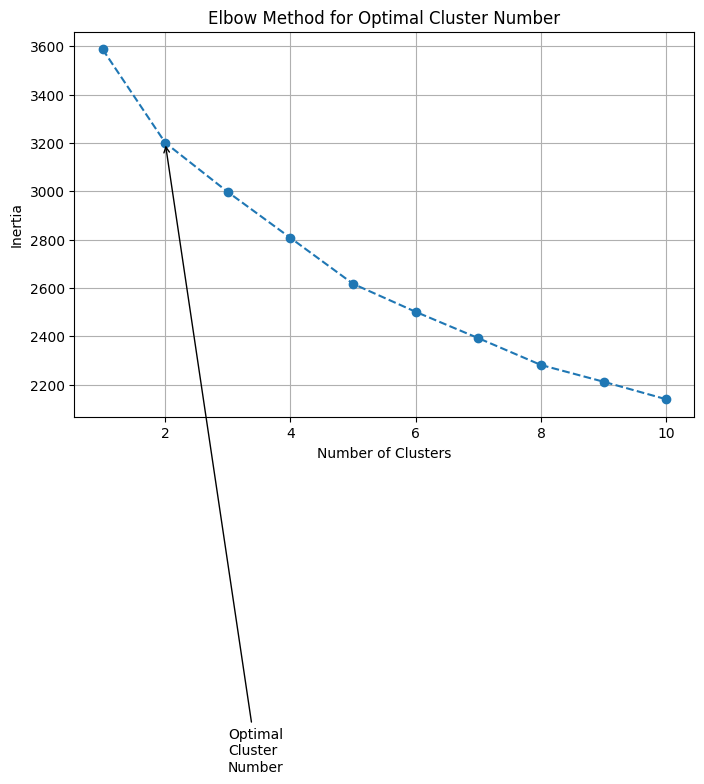

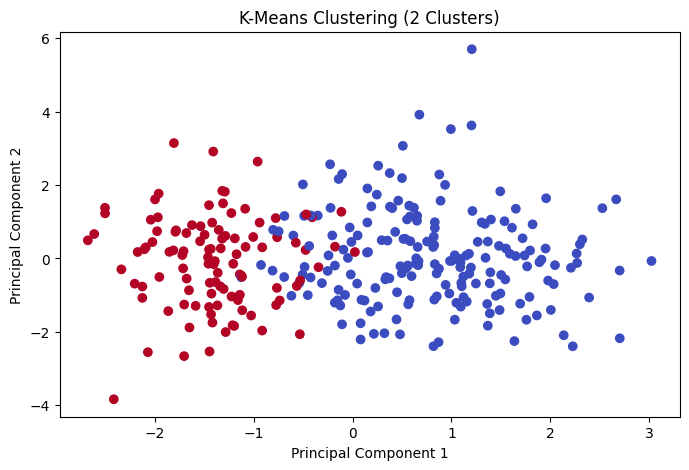

In [ ]:
#  Optimal number of clusters and visualize the clusters.


import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
heart_data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Apply K-Means clustering
X = heart_data.drop(columns=['DEATH_EVENT'])
features_scaled = StandardScaler().fit_transform(X)

# Determine the optimal number of clusters using the Elbow method
inertia_list = []
for n in range(1, 11):
    kmeans_model = KMeans(n_clusters=n, random_state=42, n_init=10)
    kmeans_model.fit(features_scaled)
    inertia_list.append(kmeans_model.inertia_)

# Visualize the Elbow method for finding the optimal number of clusters
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia_list, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Cluster Number')

# Mark the optimal number of clusters
plt.annotate('Optimal\nCluster\nNumber', xy=(2, inertia_list[1]), xytext=(3, 600),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)

plt.grid()
plt.show()

# Apply K-Means clustering with 2 clusters
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
heart_data['KMeans_Cluster'] = kmeans.fit_predict(features_scaled)

# Visualize the clusters for K-Means with 2 clusters
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=heart_data['KMeans_Cluster'], cmap='coolwarm')
plt.title('K-Means Clustering (2 Clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


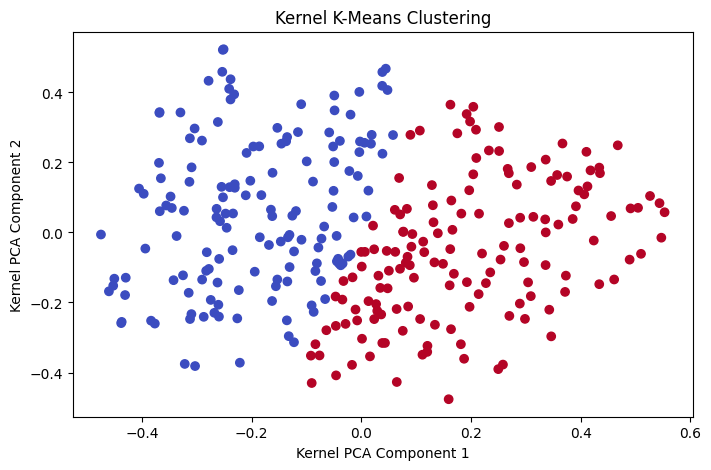

In [ ]:
# Kernel K-Means clustering with the same features and visualize the results.

from sklearn.decomposition import KernelPCA

# Implement Kernel K-Means clustering
kpca_model = KernelPCA(n_components=2, kernel='rbf')
features_kpca = kpca_model.fit_transform(features_scaled)

kernel_kmeans_model = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
heart_data['Kernel_KMeans_Cluster'] = kernel_kmeans_model.fit_predict(features_kpca)

# Visualize the Kernel K-Means clusters
plt.figure(figsize=(8, 5))
plt.scatter(features_kpca[:, 0], features_kpca[:, 1], c=heart_data['Kernel_KMeans_Cluster'], cmap='coolwarm')
plt.title('Kernel K-Means Clustering')
plt.xlabel('Kernel PCA Component 1')
plt.ylabel('Kernel PCA Component 2')
plt.show()


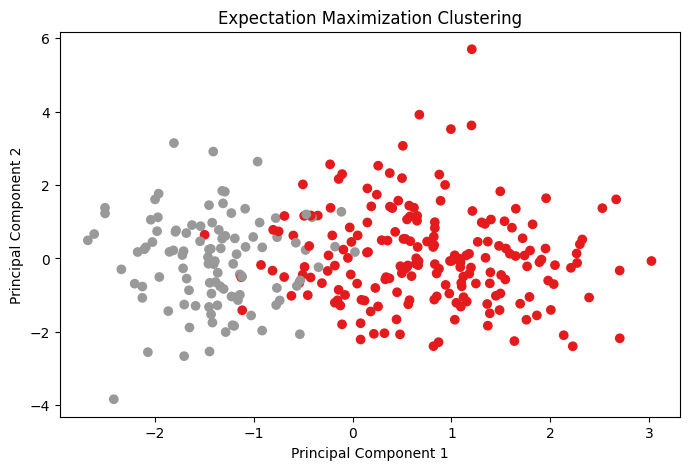

In [ ]:
# Expectation Maximization (EM) clustering.

from sklearn.mixture import GaussianMixture

# Apply Expectation Maximization (EM) clustering
n_clusters_em = 2  # Number of clusters for EM clustering
gmm = GaussianMixture(n_components=n_clusters_em, random_state=42)
heart_data['EM_Cluster'] = gmm.fit_predict(features_scaled)

# 1.4 Visualize the EM clusters
plt.figure(figsize=(8, 5))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=heart_data['EM_Cluster'], cmap='Set1')
plt.title('Expectation Maximization Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
# Compare and contrast the clustering results from K-Means, Kernel K-Means, and EM.


from sklearn.metrics import silhouette_score

# Calculate Silhouette scores for K-means, kernel k-means, EM clusters
silhouette_kmeans = silhouette_score(features_scaled, heart_data['KMeans_Cluster'])
silhouette_kernel_kmeans = silhouette_score(features_kpca, heart_data['Kernel_KMeans_Cluster'])
silhouette_em = silhouette_score(features_scaled, heart_data['EM_Cluster'])

# Print Silhouette scores
print("Silhouette Score (K-Means):", silhouette_kmeans)
print("Silhouette Score (Kernel K-Means):", silhouette_kernel_kmeans)
print("Silhouette Score (EM):", silhouette_em)


Silhouette Score (K-Means): 0.1178512561512019
Silhouette Score (Kernel K-Means): 0.33981086109318676
Silhouette Score (EM): 0.11829948210010369


**Cluster Shape:** K-Means tends to create more spherical clusters due to its distance-based clustering approach. In contrast, Kernel K-Means and EM can create more flexible and non-linear cluster shapes by transforming the data or assuming a mixture of Gaussian distributions, respectively.

**Data Transformation:** Kernel K-Means uses a kernel function to transform the data into a higher-dimensional space where it may become more separable, leading to better-defined clusters. On the other hand, EM assumes that the data is generated from a mixture of Gaussian distributions and estimates their parameters, which can capture more complex patterns in the data.

**Algorithm Assumptions:** K-Means assumes that clusters are spherical and of similar size, which may not always hold true in real-world data. Kernel K-Means and EM are more flexible in handling different cluster shapes and sizes, making them suitable for data with non-linear relationships or varying cluster densities.

In [ ]:
# Analyze the clinical significance of patient clusters in predicting 'DEATH_EVENT.'

# Load the dataset
original_data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Create a DataFrame
clustered_data = pd.concat([heart_data, original_data['DEATH_EVENT']], axis=1)

# Calculate the 'DEATH_EVENT' percentage within each K-Means cluster.
cluster_survival_rates_kmeans = clustered_data.groupby('KMeans_Cluster')['DEATH_EVENT'].mean()

# Print the survival rates for each cluster in K-Means clustering
print("K-Means Cluster Survival Rates:\n", cluster_survival_rates_kmeans)

# Repeat the above steps for Kernel K-Means and Expectation Maximization clusters
cluster_survival_rates_kernel_kmeans = clustered_data.groupby('Kernel_KMeans_Cluster')['DEATH_EVENT'].mean()
cluster_survival_rates_em = clustered_data.groupby('EM_Cluster')['DEATH_EVENT'].mean()

print("Kernel K-Means Cluster Survival Rates:\n", cluster_survival_rates_kernel_kmeans)
print("EM Cluster Survival Rates:\n", cluster_survival_rates_em)


K-Means Cluster Survival Rates:
                 DEATH_EVENT  DEATH_EVENT
KMeans_Cluster                          
0                  0.322917     0.322917
1                  0.317757     0.317757
Kernel K-Means Cluster Survival Rates:
                        DEATH_EVENT  DEATH_EVENT
Kernel_KMeans_Cluster                          
0                         0.286667     0.286667
1                         0.355705     0.355705
EM Cluster Survival Rates:
             DEATH_EVENT  DEATH_EVENT
EM_Cluster                          
0              0.319588     0.319588
1              0.323810     0.323810


**K-Means Cluster Survival Rates:**

Cluster 0: DEATH_EVENT rate of approximately 32.29%
Cluster 1: DEATH_EVENT rate of approximately 31.78%

**Kernel K-Means Cluster Survival Rates:**

Cluster 0: DEATH_EVENT rate of approximately 28.67%
Cluster 1: DEATH_EVENT rate of approximately 35.57%

**EM Cluster Survival Rates:**

Cluster 0: DEATH_EVENT rate of approximately 31.96%
Cluster 1: DEATH_EVENT rate of approximately 32.38%



**Analysis:**

**K-Means Clustering:**

Both clusters have relatively similar DEATH_EVENT rates, with Cluster 0 slightly higher than Cluster 1. This suggests that K-Means clustering did not distinctly separate patient groups based on 'DEATH_EVENT' rates.

**Kernel K-Means Clustering:**

Cluster 1 in Kernel K-Means has a notably higher DEATH_EVENT rate compared to Cluster 0. This indicates that Kernel K-Means may have identified a subgroup of patients with a higher risk of death compared to the rest of the patients.

**EM (Expectation Maximization) Clustering:**

Similar to K-Means, both clusters in EM clustering have comparable DEATH_EVENT rates. However, the difference between the rates in Cluster 0 and Cluster 1 is relatively small.

**Conclusion:**

Kernel K-Means clustering appears to have identified a cluster (Cluster 1) with a higher DEATH_EVENT rate compared to the other clusters in both K-Means and EM clustering. This indicates potential clinical significance in predicting 'DEATH_EVENT' based on the clustering results from Kernel K-Means.

K-Means and EM clustering did not show as clear a distinction between high and low-risk patient groups compared to Kernel K-Means.